In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [4]:
airports=pd.read_csv('csv_airports_v1.csv')
routes=pd.read_csv('csv_routes_v1.csv')
display(airports)
display(routes)

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...,...
7692,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N
7693,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N
7694,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N
7695,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N


,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Equipment
0,2B,410,ASF,2966,KZN,2990,CR2
1,2B,410,ASF,2966,MRV,2962,CR2
2,2B,410,CEK,2968,KZN,2990,CR2
3,2B,410,CEK,2968,OVB,4078,CR2
4,2B,410,DME,4029,KZN,2990,CR2
...,...,...,...,...,...,...,...
67657,ZL,4178,WYA,6334,ADL,3341,SF3
67658,ZM,19016,DME,4029,FRU,2912,734
67659,ZM,19016,FRU,2912,DME,4029,734
67660,ZM,19016,FRU,2912,OSS,2913,734


## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [566]:
airports.info()
routes.info()
airports[airports=='\\N']=np.nan
airports.info()
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  6071 non-null   object 
 5   ICAO                  7696 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7344 non-null   object 
 10  DST                   7344 non-null   object 
 11  Tz database timezone  6676 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Co

## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [568]:
iata_arports=airports[airports['IATA'].notna()]
import pycountry_convert as pc
dict_maps={"Cote d'Ivoire":'Africa','Congo (Brazzaville)':'Africa','Congo (Kinshasa)':'Africa','Saint Helena':'Africa','Reunion':'Africa',
           'Midway Islands':'Oceania','Antarctica':'Antarctica','Virgin Islands':'South America','Netherlands Antilles':'South America','Burma':'Asia',
          'East Timor':'Asia','Johnston Atoll':'Oceania','Western Sahara':'Africa','Wake Island':'Oceania'} #создаем словарь с отсутствующими странами
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return dict_maps[country_name]
iata_arports['Continents']=iata_arports['Country'].map(country_to_continent)
iata_arports.head()


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19820\2117311604.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Continents
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,Oceania
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,Oceania
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,Oceania
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,Oceania
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,Oceania


## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

In [10]:
#закачиваем нужные библиотеки для визуализации геоданных
!pip install geopandas
!pip install geodatasets

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for geodatasets from https://files.pythonhosted.org/packages/d4/b0/dccab6d4dc86d832b5503d261d4bdceb2331fd4f0abe4726b8f44e7d61a4/geodatasets-2023.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for pooch from https://files.pythonhosted.org/packages/f4/72/8ae0f1ba4ce6a4f6d4d01a60a9fdf690fde188c45c1872b0b4ddb0607ace/pooch-1.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/63.0 kB ? eta -:--:--
   ------------------- -------------------- 30.7/63.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 63.0/63.0 kB 675.8 kB/s eta 0:00:00


<Axes: >

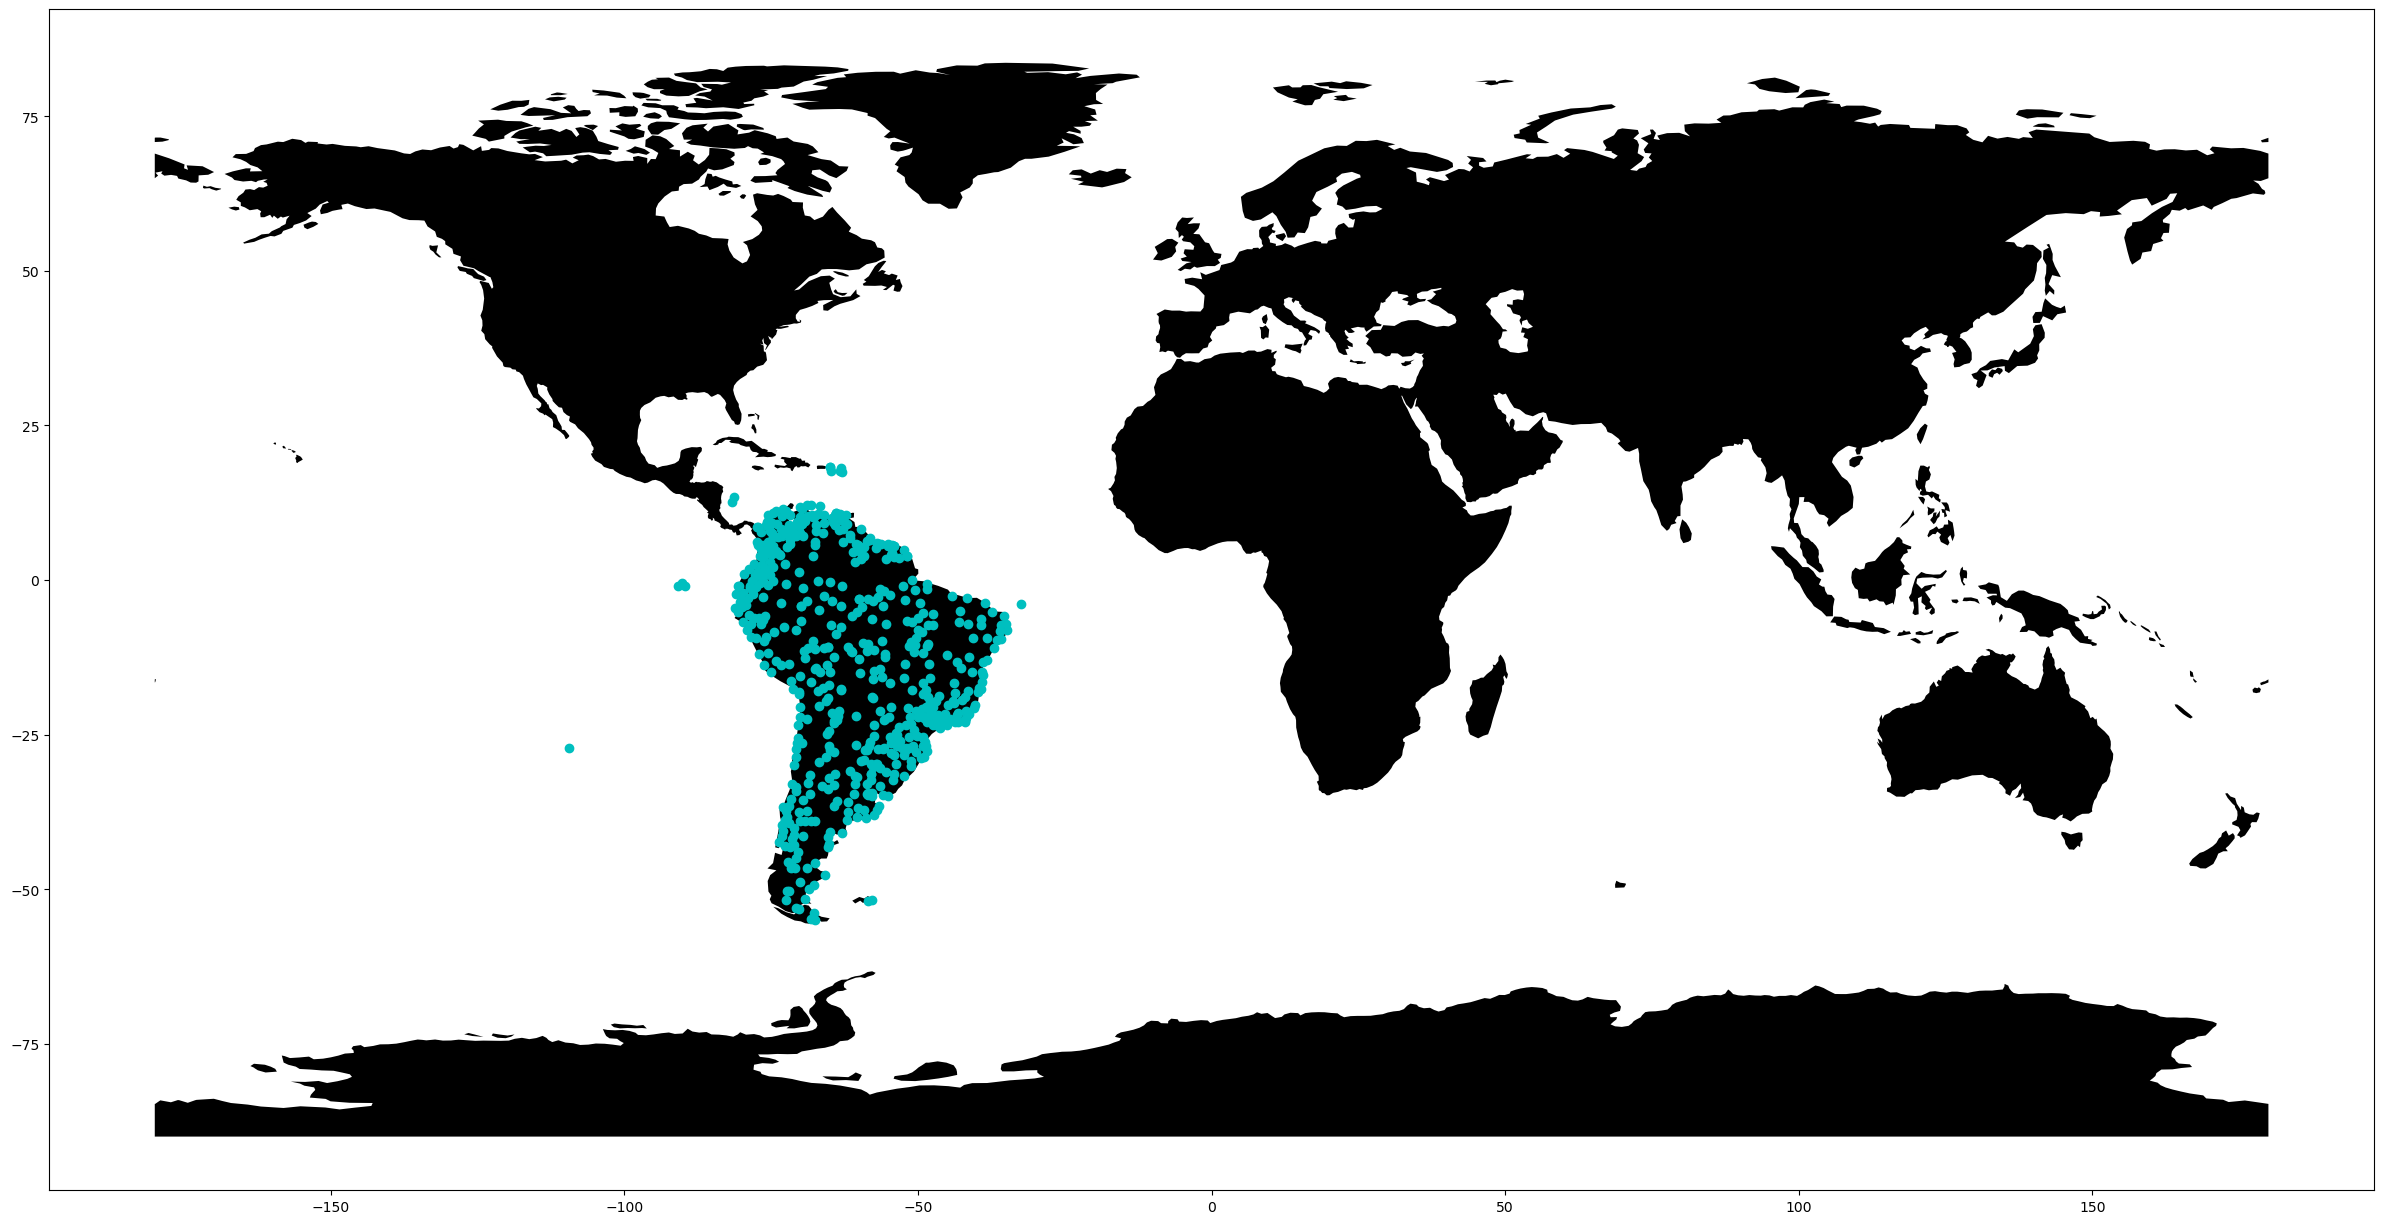

In [561]:
import geopandas
import geodatasets
from geodatasets import get_path
gdf = geopandas.GeoDataFrame(
    iata_arports, geometry=geopandas.points_from_xy(iata_arports.Longitude, iata_arports.Latitude), crs="EPSG:4326"
) #получаем для каждого аэропорта геометрию(широту и долготу в одном столбце)
rand_cont=gdf[gdf['Continents']==np.random.choice(iata_arports['Continents'].unique())] #реализуем случаынй выбор континента и фильтруем данные по этому континенту
world = geopandas.read_file(get_path("naturalearth.land")) #задаем карту мира
fig,ax= plt.subplots(1,figsize=(30,20))
base=world.plot(ax=ax,color='k')
rand_cont.plot(ax=base,color='c')

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19820\3532639854.py:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



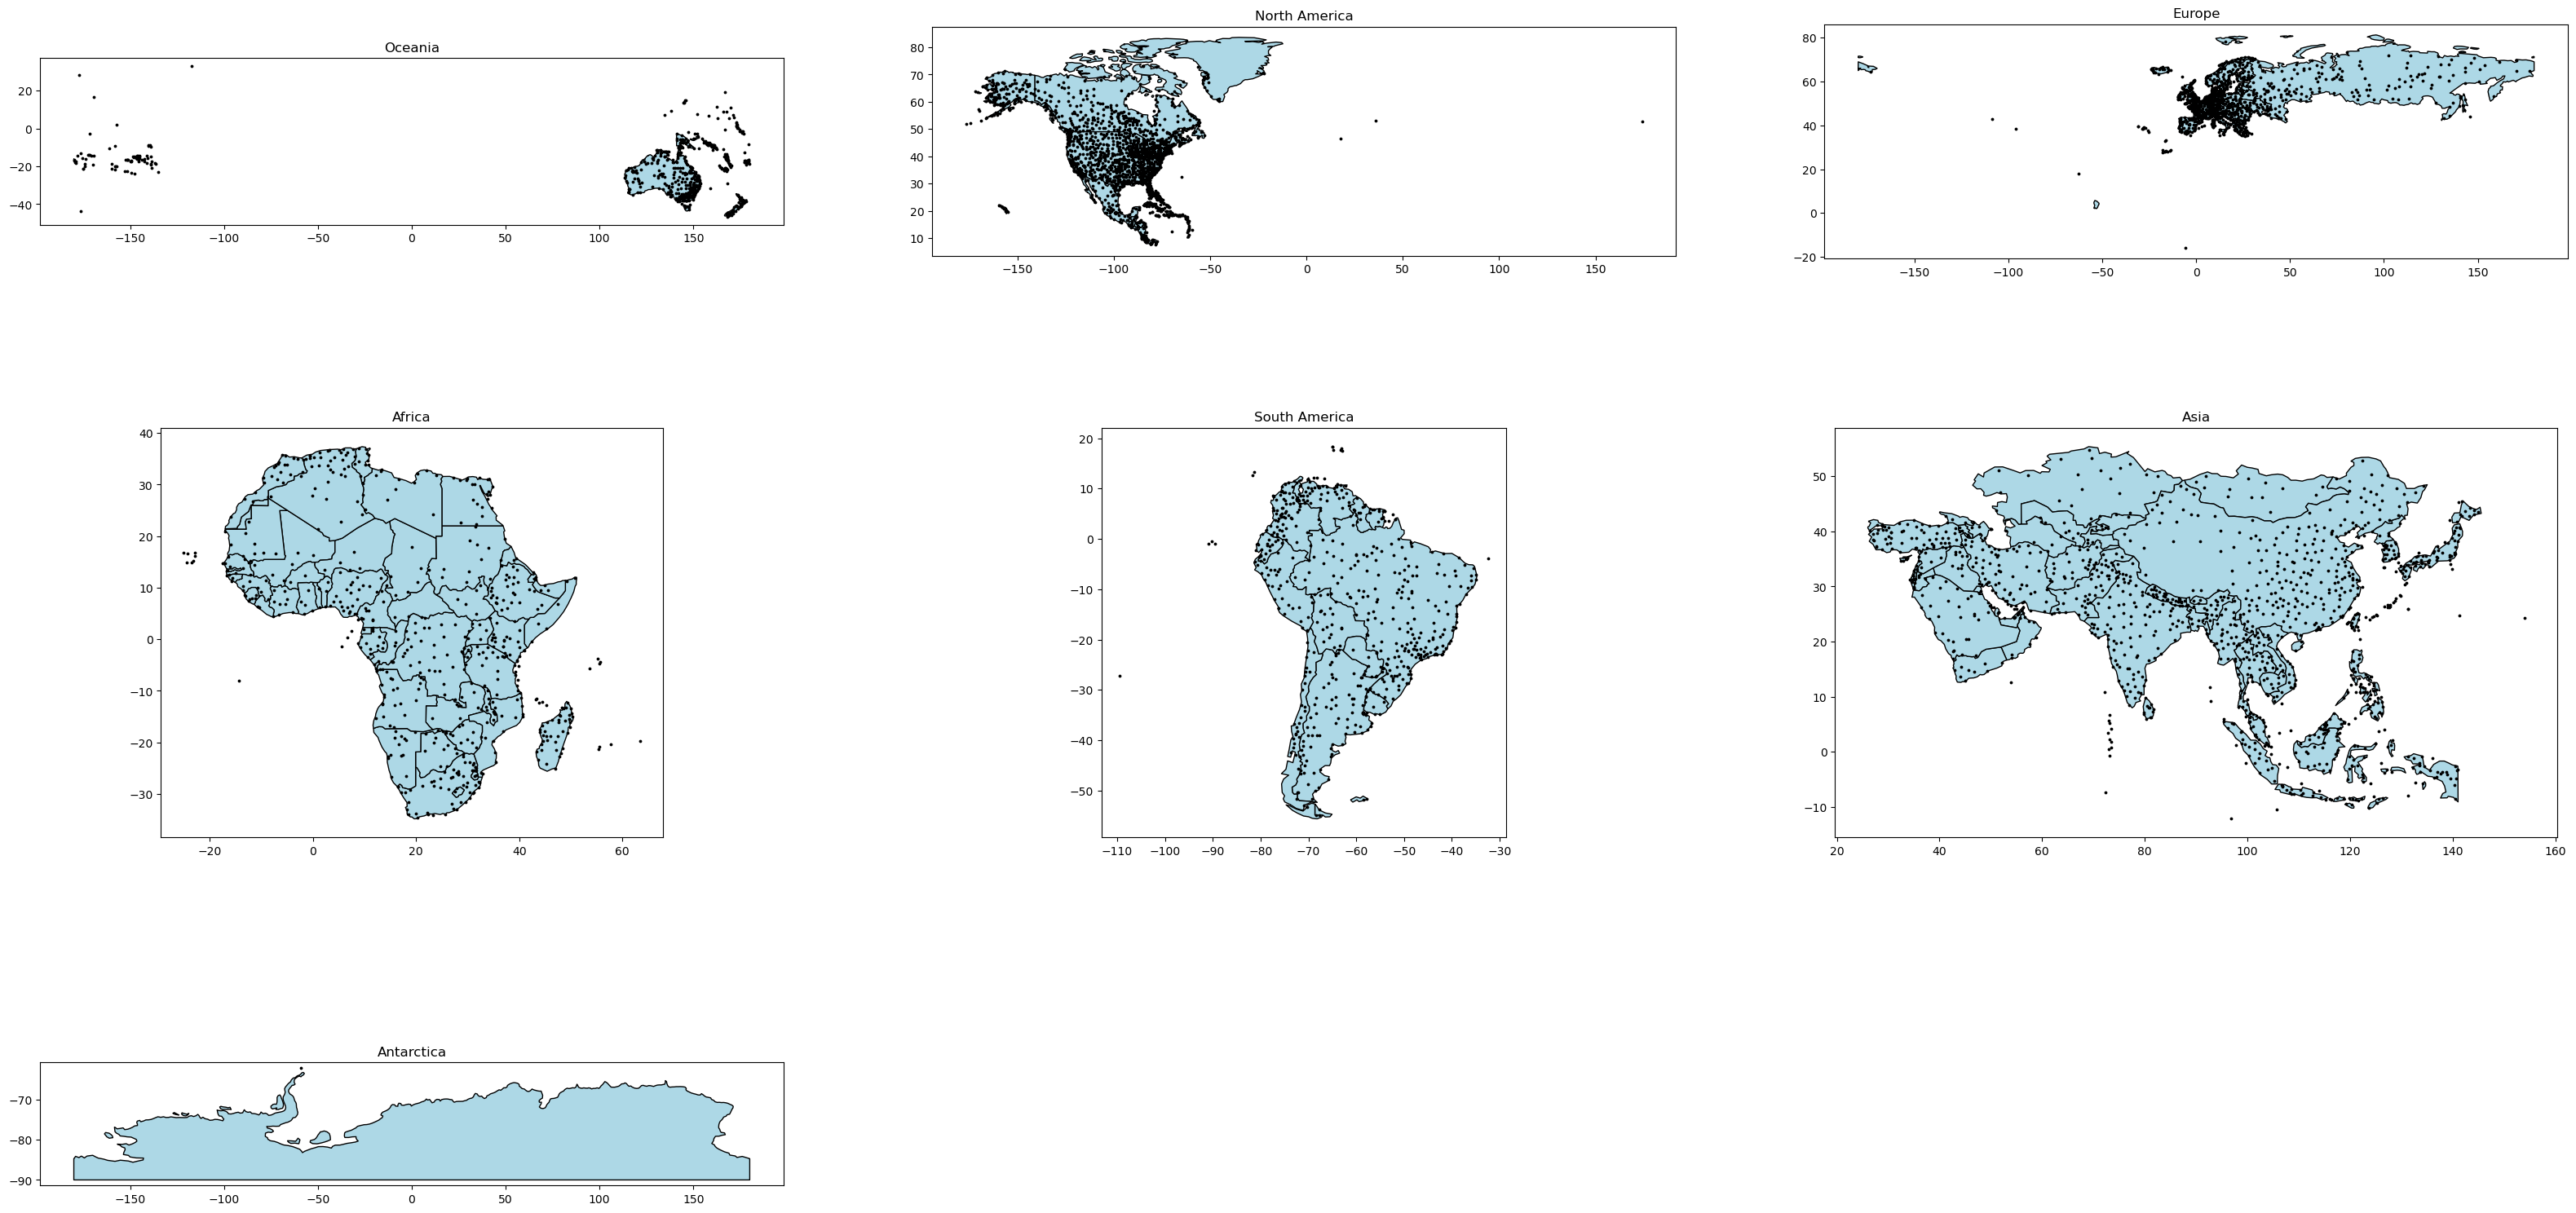

In [562]:
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(4, 3, 1) 
ax2 = fig.add_subplot(4, 3, 2) 
ax3 = fig.add_subplot(4, 3, 3)
ax4 = fig.add_subplot(4, 3, 4)
ax5 = fig.add_subplot(4, 3, 5)
ax6 = fig.add_subplot(4, 3, 6)
ax7 = fig.add_subplot(4, 3, 7) 
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7]
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
for i in range(7):
    base=world[world.continent==gdf['Continents'].unique()[i]].plot(ax=axs[i],color='lightblue',edgecolor='black')
    m=gdf['Continents'].unique()[i]
    axs[i].set_title(f'{m}')
    cont=gdf[gdf['Continents']==m]
    cont.plot(ax=base,color='k',markersize=3)
    


## Почти во всех континентах есть выбросы

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [571]:
cont=np.random.choice(iata_arports['Continents'].unique()) #реализуем случаынй выбор континента
rand_country=iata_arports[iata_arports['Continents']==cont]
rand_country=rand_country[['IATA','Country']]
rand_country.head() #выведем дата фрейм стран и аэропортов одного континента

,IATA,Country
5,UAK,Greenland
6,GOH,Greenland
7,SFJ,Greenland
8,THU,Greenland
19,YAM,Canada


In [572]:
df=routes.groupby('Source airport')['Airline'].count() #считаем количество посадок и вылетов в каждом аэропорту
df1=routes.groupby('Destination airport')['Airline'].count()
df=pd.DataFrame(df)
df1=pd.DataFrame(df1)
df=df.reset_index()
df1=df1.reset_index()
df.columns=['Source airport','quantaty of departures']
df1.columns=['Destination airport','quantatu of arrivals']
df=df[df['Source airport'].isin(rand_country['IATA'])] #проверяем какие из них входят в аэропорты нашего случ выбранного континента
df1=df1[df1['Destination airport'].isin(rand_country['IATA'])]
merged=df.merge(df1,left_on='Source airport',right_on='Destination airport') #сливаем таблички с количествами вылетов и приземлений
merged=merged.drop(columns='Destination airport') #столбец с аналогичными данными с Source airport дропааем
merged.columns=['IATA','quantaty of departures','quantaty of arrivals'] #для удобства дальнейшего использования переименуем на IATA столбик Source airport
merged

,IATA,quantaty of departures,quantaty of arrivals
0,ABE,13,13
1,ABI,2,2
2,ABL,4,4
3,ABQ,42,41
4,ABR,1,1
...,...,...,...
931,ZRJ,2,3
932,ZSA,4,4
933,ZSJ,3,3
934,ZTB,2,2


In [573]:
data=rand_country.merge(merged,on='IATA') #сливаем два дата фрейма чтобы получить столбик со страной
data=data.groupby('Country')[['quantaty of departures','quantaty of arrivals']].sum().sort_index() #суммируем количество взлетов и посадок по всем аэропортом
#чтобы получить количество взлетов и посадок по странам
data


,quantaty of departures,quantaty of arrivals
Country,,
Anguilla,6,6
Antigua and Barbuda,35,34
Aruba,44,46
Bahamas,147,148
Barbados,23,23
Belize,39,39
Bermuda,15,15
British Virgin Islands,16,16
Canada,1852,1861


In [323]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 393.8 kB/s eta 0:00:01
   ---------------------------------- --- 112.6/125.4 kB 726.2 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 817.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB

In [327]:
import geopy.geocoders
from geopy.geocoders import Nominatim

In [574]:
app = Nominatim(user_agent="tutorial")
data['lat']=0
data['lon']=0
for i in data.index:
    location = app.geocode(i).raw
    data.loc[i,'lat']=location.get('lat')
    data.loc[i,'lon']=location.get('lon')
data #для каждой страны получаем ее местоположение

,quantaty of departures,quantaty of arrivals,lat,lon
Country,,,,
Anguilla,6,6,18.1954947,-63.0750234
Antigua and Barbuda,35,34,17.2234721,-61.9554608
Aruba,44,46,12.51756625,-69.98186415210564
Bahamas,147,148,24.7736546,-78.0000547
Barbados,23,23,13.1500331,-59.5250305
Belize,39,39,17.1204943,-88.6859028
Bermuda,15,15,32.3040273,-64.7563086
British Virgin Islands,16,16,18.4024395,-64.5661642
Canada,1852,1861,61.0666922,-107.991707


In [374]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [413]:
import plotly.graph_objects as go 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

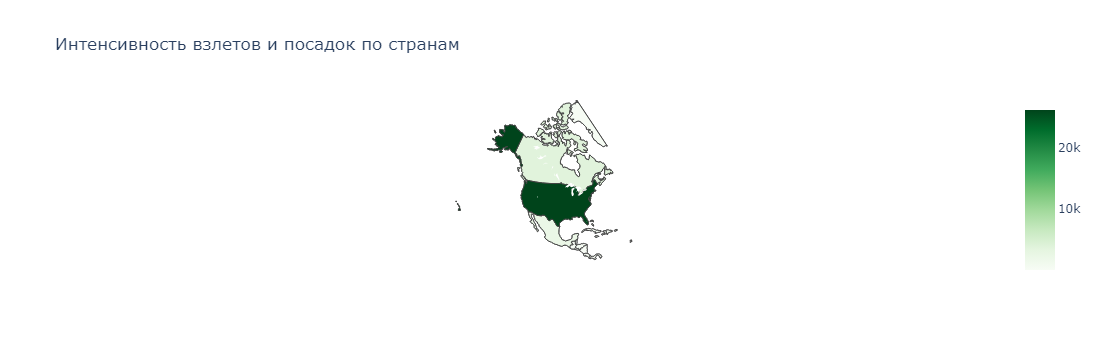

In [575]:
df = geopandas.GeoDataFrame(
  data, geometry=geopandas.points_from_xy(data.lon, data.lat), crs="EPSG:4326"
) #выводим геометрию стран
df['Sum']=df['quantaty of arrivals']+df['quantaty of arrivals'] #суммируем взлеты и посадки
data1=dict(type='choropleth',
           colorscale='Greens',
           locations=df.index,
           locationmode='country names',
           z=df['Sum'])
layout=dict(title='Интенсивность взлетов и посадок по странам',geo=dict(scope=cont.lower(),showlakes=True))
choromap=go.Figure(data=[data1],layout=layout)

iplot(choromap)




## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

In [576]:
dfs=[]
cont=iata_arports['Continents'].unique()
#делаем все аналогично 5 заданию, только теперь пробегаемся по каждому континенту и берем 10 самых больших по взлетам и посадкам аэропорты
for i in cont:
    rand_country=iata_arports[iata_arports['Continents']==i]
    rand_country=rand_country[['IATA','Country']]
    df=routes.groupby('Source airport')['Airline'].count()
    df1=routes.groupby('Destination airport')['Airline'].count()
    df=pd.DataFrame(df).reset_index()
    df1=pd.DataFrame(df1).reset_index()
    df.columns=['Source airport','quantaty of departures']
    df1.columns=['Destination airport','quantaty of arrivals']
    df['Continents']=i
    df=df[df['Source airport'].isin(rand_country['IATA'])].nlargest(10,'quantaty of departures')
    df1=df1[df1['Destination airport'].isin(rand_country['IATA'])].nlargest(10,'quantaty of arrivals')
    merged=df.merge(df1,left_on='Source airport',right_on='Destination airport')
    dfs.append(merged)
dfs=pd.concat(dfs)
dfs=dfs.merge(iata_arports[['City','IATA','Name of airport','Country']],left_on='Source airport',right_on='IATA')
dfs=dfs.set_index(['Continents','Name of airport'])
dfs=dfs.drop(columns=['Source airport','Destination airport'])
dfs

quantaty of departures  \
Continents    Name of airport                                                              
Oceania       Sydney Kingsford Smith International Airport                           208   
              Brisbane International Airport                                         152   
              Melbourne International Airport                                        137   
              Auckland International Airport                                          96   
              Perth International Airport                                             92   
              Cairns International Airport                                            56   
              Port Moresby Jacksons International Airport                             52   
              Adelaide International Airport                                          51   
              Darwin International Airport                                            46   
              Nadi International Airport                                              43   
North America Hartsfield Jackson Atlanta International Airport                       915   
              Chicago O'Hare International Airport                                   558   
              Los Angeles International Airport                                      492   
              Dallas Fort Worth International Airport                                469   
              John F Kennedy International Airport                                   456   
              Miami International Airport                                            368   
              Denver International Airport                                           361   
              Lester B. Pearson International Airport                                319   
              Charlotte Douglas International Airport                                301   
              Philadelphia International Airport                                     289   
Europe        London Heathrow Airport                                                527   
              Charles de Gaulle International Airport                                524   
              Frankfurt am Main Airport                                              497   
              Amsterdam Airport Schiphol                                             453   
              Barcelona International Airport                                        391   
              Munich Airport                                                         368   
              London Gatwick Airport                                                 356   
              Leonardo da Vinci–Fiumicino Airport                                    331   
              Adolfo Suárez Madrid–Barajas Airport                                   330   
              Domodedovo International Airport                                       324   
Africa        OR Tambo International Airport                                         159   
              Cairo International Airport                                            151   
              Jomo Kenyatta International Airport                                    130   
              Mohammed V International Airport                                       125   
              Addis Ababa Bole International Airport                                 105   
              Houari Boumediene Airport                                               88   
              Tunis Carthage International Airport                                    87   
              Menara Airport                                                          73   
              Léopold Sédar Senghor International Airport                             67   
              Murtala Muhammed International Airport                                  60   
South America Guarulhos - Governador André Franco Montoro Int...                     193   
              El Dorado International Airport                                        152   
              Jorg

<Axes: title={'center': '10 самых больших аэропортов в каждом континенте '}>

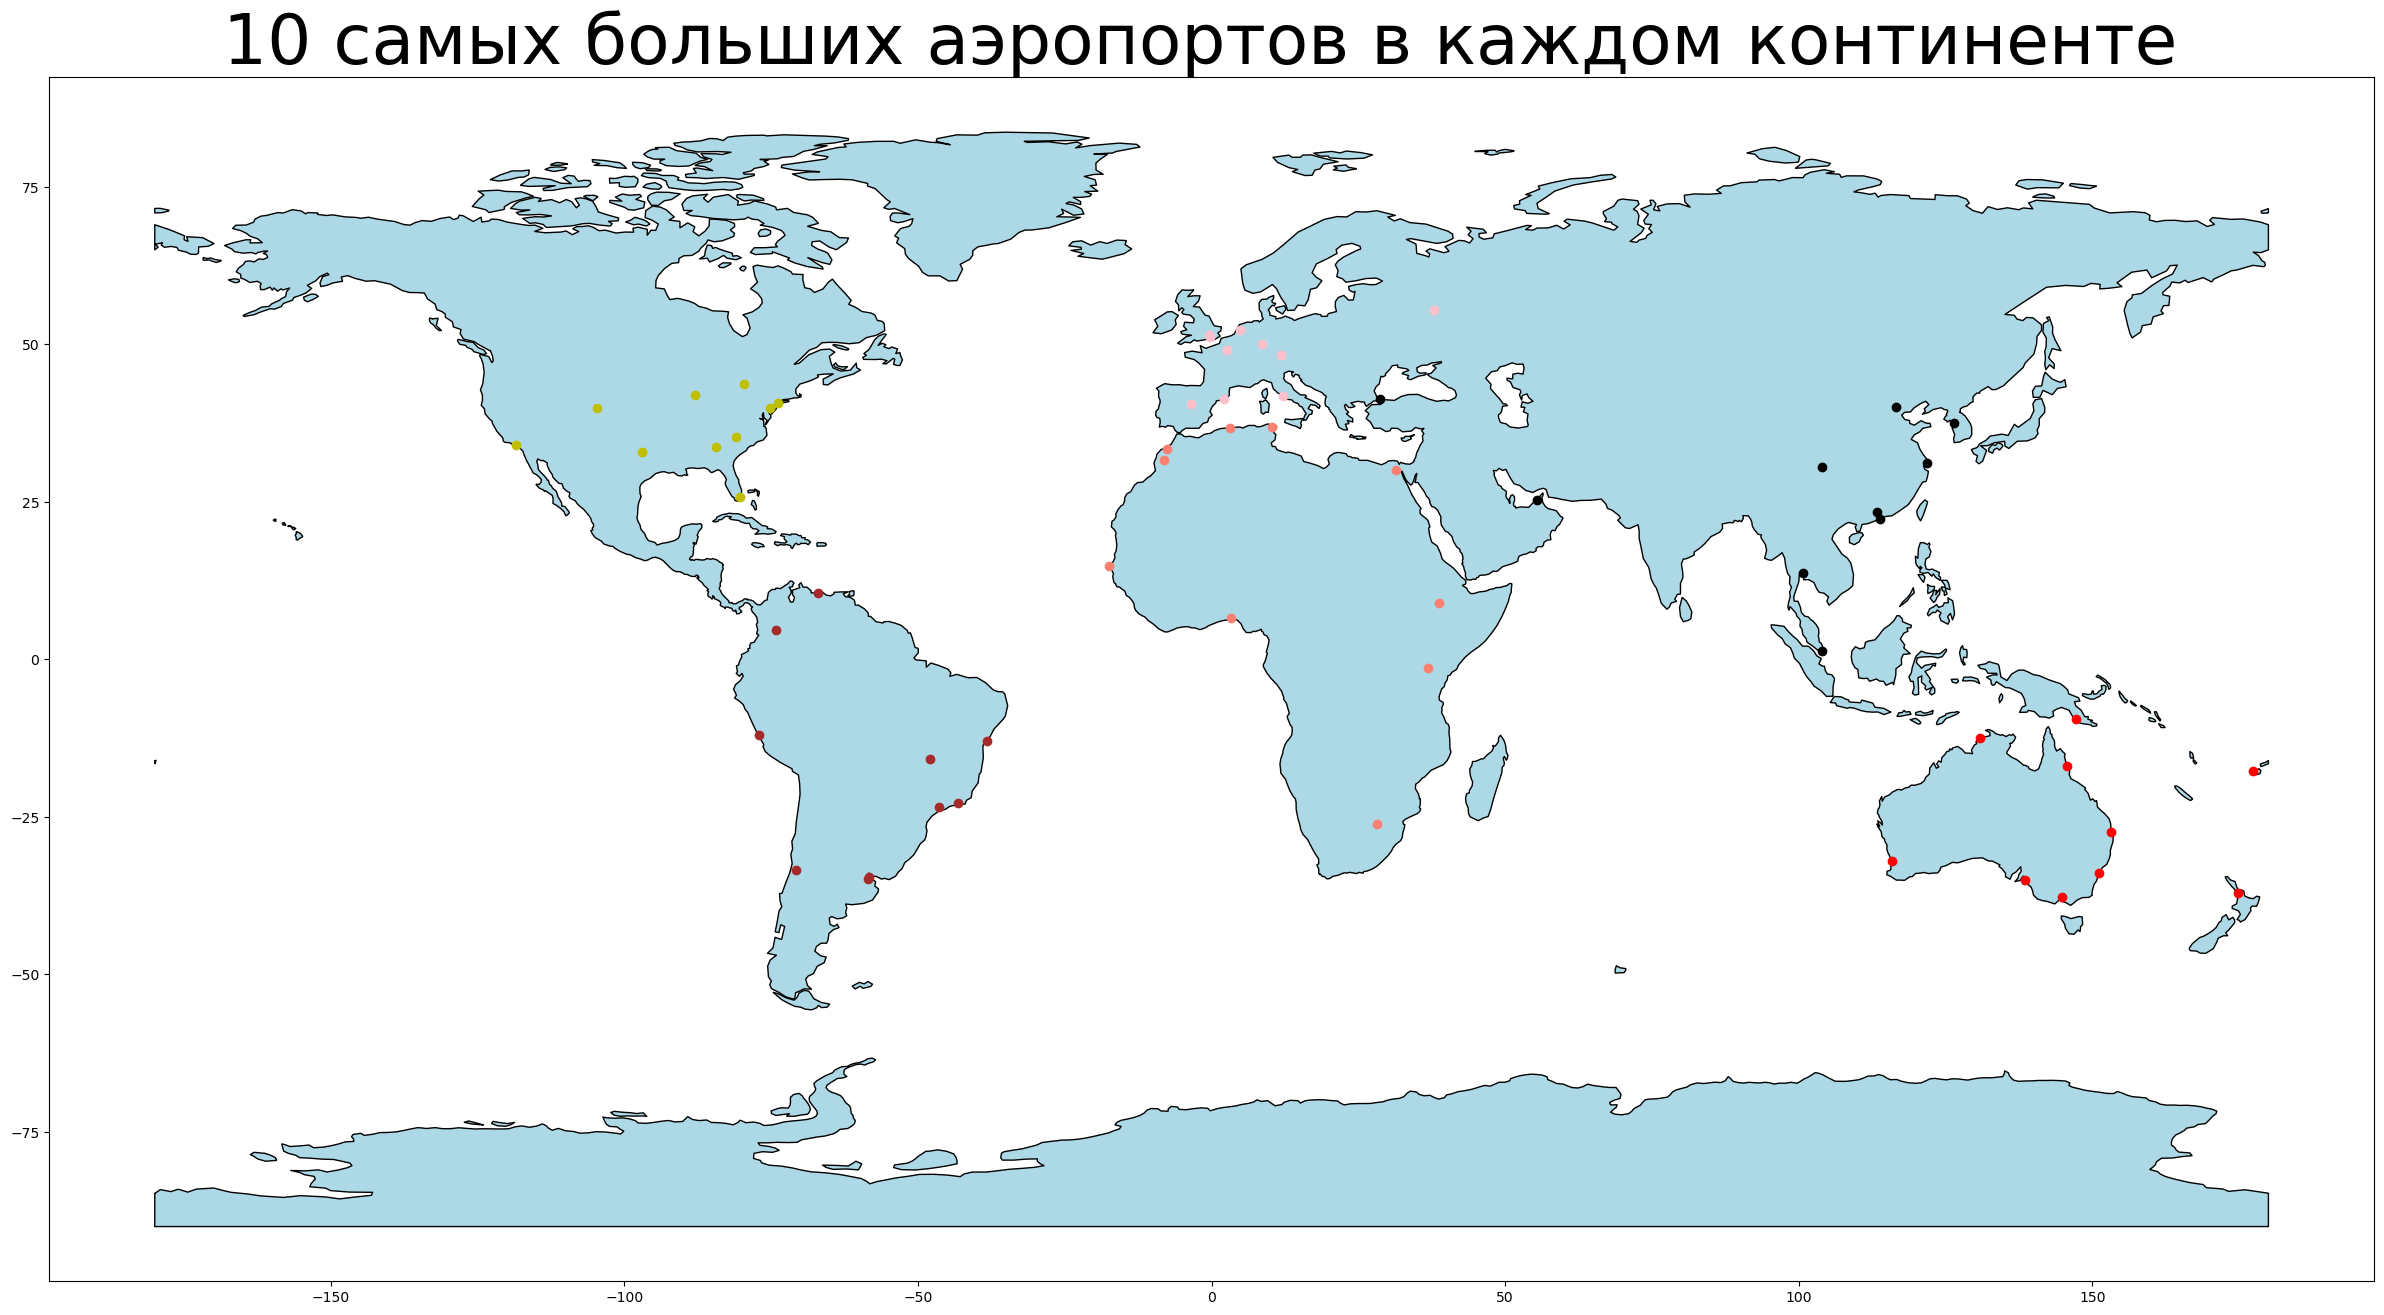

In [578]:
pdf=dfs.merge(iata_arports[['Latitude','Longitude','IATA']],on='IATA')
gdf = geopandas.GeoDataFrame(
  pdf, geometry=geopandas.points_from_xy(pdf.Longitude, pdf.Latitude), crs="EPSG:4326")
gdf=gdf.iloc[:,2:]
world = geopandas.read_file(get_path("naturalearth.land"))
fig,ax= plt.subplots(1,figsize=(30,20))
ax.set_title('10 самых больших аэропортов в каждом континенте ',size=50)
base=world.plot(ax=ax,color='lightblue',edgecolor='black')
gdf[0:10].plot(ax=base,color='r')
gdf[10:20].plot(ax=base,color='y')
gdf[20:30].plot(ax=base,color='pink')
gdf[30:40].plot(ax=base,color='salmon')
gdf[40:50].plot(ax=base,color='brown')
gdf[50:60].plot(ax=base,color='k')




## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз. 

In [7]:
eqip=routes.groupby('Equipment')['Destination airport'].count()
wiki=pd.read_html('https://en.wikipedia.org/wiki/List_of_aircraft_type_designators')[0]
eqip=pd.DataFrame(eqip)
eqip=eqip.nlargest(10,'Destination airport')
wiki=wiki.drop(columns='ICAO code[3]')
eqip=eqip.reset_index()

In [10]:
data2=eqip.merge(wiki,how='left',left_on='Equipment',right_on=
           'IATA type code')
data2.drop(columns='IATA type code')

,Equipment,Destination airport,Model
0,320,9180,Airbus A320
1,738,7124,Boeing 737-800
2,319,3420,Airbus A319
3,737,2211,NaN
4,73H,2043,Boeing 737-800 Winglets
5,CRJ,1238,NaN
6,AT7,1194,Aerospatiale/Alenia ATR 72-201/-202
7,73W,1155,Boeing 737-700 Winglets
8,321,1146,Airbus A321
9,E90,1049,Embraer 190 / Lineage 1000


##### некоторых данных(CRJ и 737) нет в указанной базе на википедии,поэтому в таблице на этих местах пропущены значения
